In [8]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import random
train_set = torchvision.datasets.FashionMNIST(root = ".", train=True,
download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False,
download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32,
shuffle=False)

torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

**Question 2**

In [2]:
class MyCNN(nn.Module):
    def __init__(self, activation="relu",dropout_rate=0):
        activations = {"relu":nn.ReLU,"tanh":nn.Tanh,"sigmoid":nn.Sigmoid,"elu":nn.ELU}
        self.activ_fnc = activations[activation]
        super(MyCNN, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(1,32,5),self.activ_fnc(),nn.MaxPool2d(2,stride=2),
                                  nn.Conv2d(32,64,5),self.activ_fnc(),nn.MaxPool2d(2,stride=2))
        self.fn = nn.Sequential(nn.Linear(1024,1024),self.activ_fnc(),
                                nn.Linear(1024,256),self.activ_fnc(),nn.Dropout(dropout_rate),
                                nn.Linear(256,10))
        
    def forward(self,x):
        x = self.conv(x)
        x = x.view(x.size(0),-1)
        x = self.fn(x)
        return x

The forward method above calls the convolution part of the NN and then reshapes the input and then passes it to the fully-connected layers

In [3]:
def weight_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)

The weight is initialized using the Xavier Uniform Initialization.

In [4]:
def evaluation(dataloader):
    total, correct = 0,0
    net.eval()
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct/total

In [5]:
device = torch.device("cuda:0")
alpha = 0.1

net = MyCNN().to(device)
net.apply(weight_init)

## Cross entropy loss is the most appropriate loss function to use.
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
for epoch in range(max_epochs):
    loss_epoch = 0
    for i,data in enumerate(train_loader, 0):
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        opt.zero_grad()
        outputs = net(inputs)
        
        loss = loss_fn(outputs, labels)
        
        loss.backward()
        
        opt.step()
        
        loss_epoch += loss.item()
        
    loss_epoch_array.append(loss_epoch)
    train_accuracy.append(evaluation(train_loader))
    test_accuracy.append(evaluation(test_loader))
    print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 970.6549124345183, train accuracy: 87.14833333333333, valid accuracy:85.58
Epoch 2: loss: 599.2694033570588, train accuracy: 89.74833333333333, valid accuracy:88.43
Epoch 3: loss: 506.62652710825205, train accuracy: 90.77666666666667, valid accuracy:89.16
Epoch 4: loss: 443.1512000653893, train accuracy: 91.42833333333333, valid accuracy:89.48
Epoch 5: loss: 390.8054812476039, train accuracy: 92.14833333333333, valid accuracy:89.73
Epoch 6: loss: 342.0753384772688, train accuracy: 92.72666666666667, valid accuracy:89.79
Epoch 7: loss: 298.64894930273294, train accuracy: 93.13166666666666, valid accuracy:90.16
Epoch 8: loss: 261.6833744975738, train accuracy: 92.73333333333333, valid accuracy:89.4
Epoch 9: loss: 236.08778844424523, train accuracy: 93.18333333333334, valid accuracy:89.35
Epoch 10: loss: 211.80815042427275, train accuracy: 94.09333333333333, valid accuracy:89.97
Epoch 11: loss: 198.66631407570094, train accuracy: 93.03333333333333, valid accuracy:88.91
Epoc

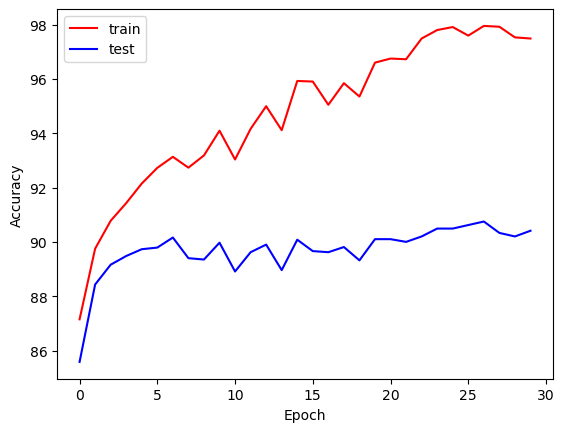

In [6]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracy, "r")
plt.plot(test_accuracy, "b")
plt.gca().legend(('train','test'))

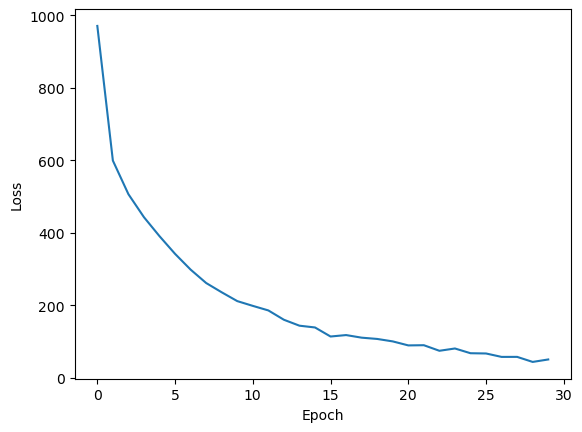

In [7]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

The above are the Accuracy on the training and test set of the first model and the loss of this model, as the number of epochs increases.

**Question 3**

Training model with tanh activation function:
Epoch 1: loss: 865.5392635762691, train accuracy: 88.17333333333333, valid accuracy:87.06
Epoch 2: loss: 591.0931165702641, train accuracy: 90.31, valid accuracy:88.54
Epoch 3: loss: 495.4862730782479, train accuracy: 91.52, valid accuracy:89.23
Epoch 4: loss: 424.25718937814236, train accuracy: 92.14333333333333, valid accuracy:89.42
Epoch 5: loss: 361.606088809669, train accuracy: 92.93833333333333, valid accuracy:89.51
Epoch 6: loss: 303.6660892991349, train accuracy: 94.14166666666667, valid accuracy:89.82
Epoch 7: loss: 253.07473653368652, train accuracy: 95.005, valid accuracy:90.36
Epoch 8: loss: 202.71665092278272, train accuracy: 95.41166666666666, valid accuracy:90.35
Epoch 9: loss: 160.44362077722326, train accuracy: 95.85, valid accuracy:90.31
Epoch 10: loss: 132.60187638539355, train accuracy: 95.99166666666666, valid accuracy:90.22
Epoch 11: loss: 109.04836044670083, train accuracy: 96.59333333333333, valid accuracy:90.25
Epoc

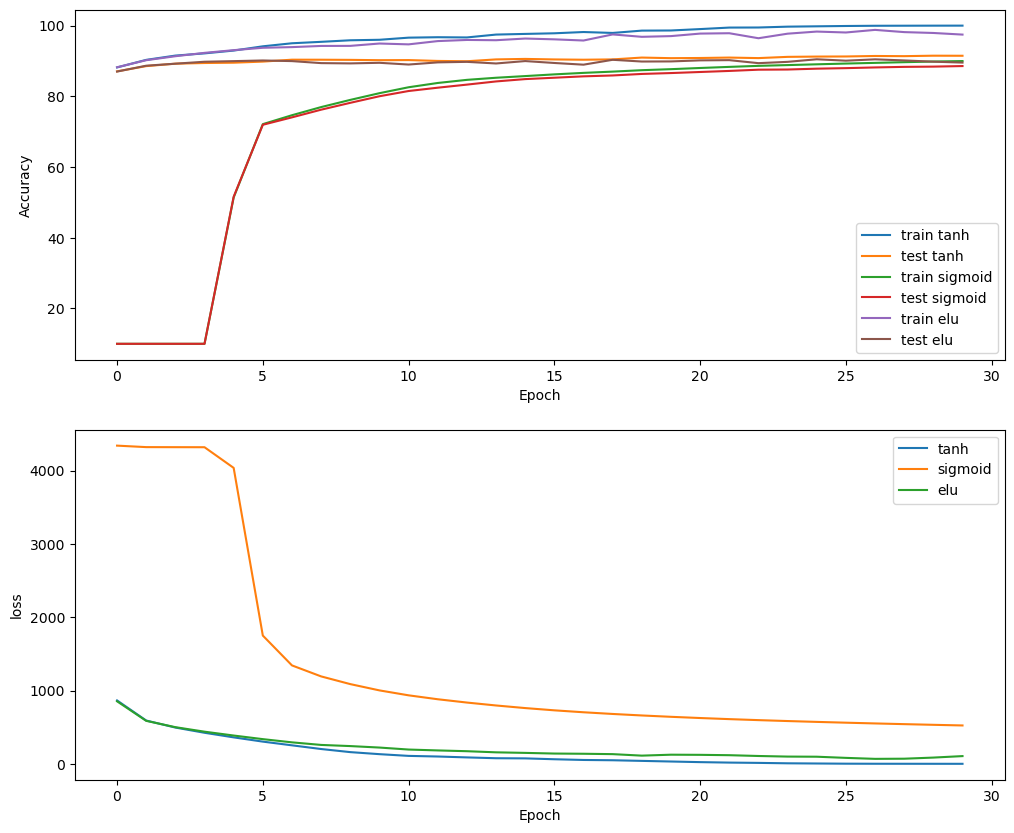

In [43]:
fig,axs = plt.subplots(2,figsize=(12,10))

activations = ["tanh","sigmoid","elu"]
for k in range(len(activations)):
    device = torch.device("cuda:0")
    alpha = 0.1

    net = MyCNN(activation=activations[k]).to(device)
    net.apply(weight_init)

    ## Cross entropy loss is the most appropriate loss function to use.
    loss_fn = nn.CrossEntropyLoss()
    loss_fn.to(device)

    opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    test_accuracy = []
    print(f"Training model with {activations[k]} activation function:")
    for epoch in range(max_epochs):
        loss_epoch = 0
        for i,data in enumerate(train_loader, 0):
            net.train()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            opt.zero_grad()
            outputs = net(inputs)

            loss = loss_fn(outputs, labels)

            loss.backward()

            opt.step()

            loss_epoch += loss.item()

        loss_epoch_array.append(loss_epoch)
        train_accuracy.append(evaluation(train_loader))
        test_accuracy.append(evaluation(test_loader))
        print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Accuracy")
    axs[0].plot(train_accuracy, label=f"train {activations[k]}")
    axs[0].plot(test_accuracy, label=f"test {activations[k]}")
    axs[0].legend()

    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("loss")
    axs[1].plot(loss_epoch_array, label=activations[k])
    axs[1].legend()

The figures above show the accuracy on the test set and training set and the loss on the training set for each of the models: tanh, sigmoid, and elu.

Q4

Training model with learning rate 0.001:
Epoch 1: loss: 3001.6616295576096, train accuracy: 68.75, valid accuracy:68.57
Epoch 2: loss: 1509.6666285693645, train accuracy: 73.18166666666667, valid accuracy:72.71
Epoch 3: loss: 1339.703690648079, train accuracy: 75.715, valid accuracy:75.07
Epoch 4: loss: 1244.8845057487488, train accuracy: 77.28, valid accuracy:76.53
Epoch 5: loss: 1174.7699650228024, train accuracy: 78.60333333333334, valid accuracy:77.75
Epoch 6: loss: 1117.3128032386303, train accuracy: 79.575, valid accuracy:78.62
Epoch 7: loss: 1069.369204863906, train accuracy: 80.45166666666667, valid accuracy:79.52
Epoch 8: loss: 1027.8962024897337, train accuracy: 81.18333333333334, valid accuracy:80.28
Epoch 9: loss: 991.536258623004, train accuracy: 81.81333333333333, valid accuracy:81.02
Epoch 10: loss: 959.5365033894777, train accuracy: 82.41833333333334, valid accuracy:81.8
Epoch 11: loss: 931.2443853914738, train accuracy: 82.955, valid accuracy:82.22
Epoch 12: loss: 906.

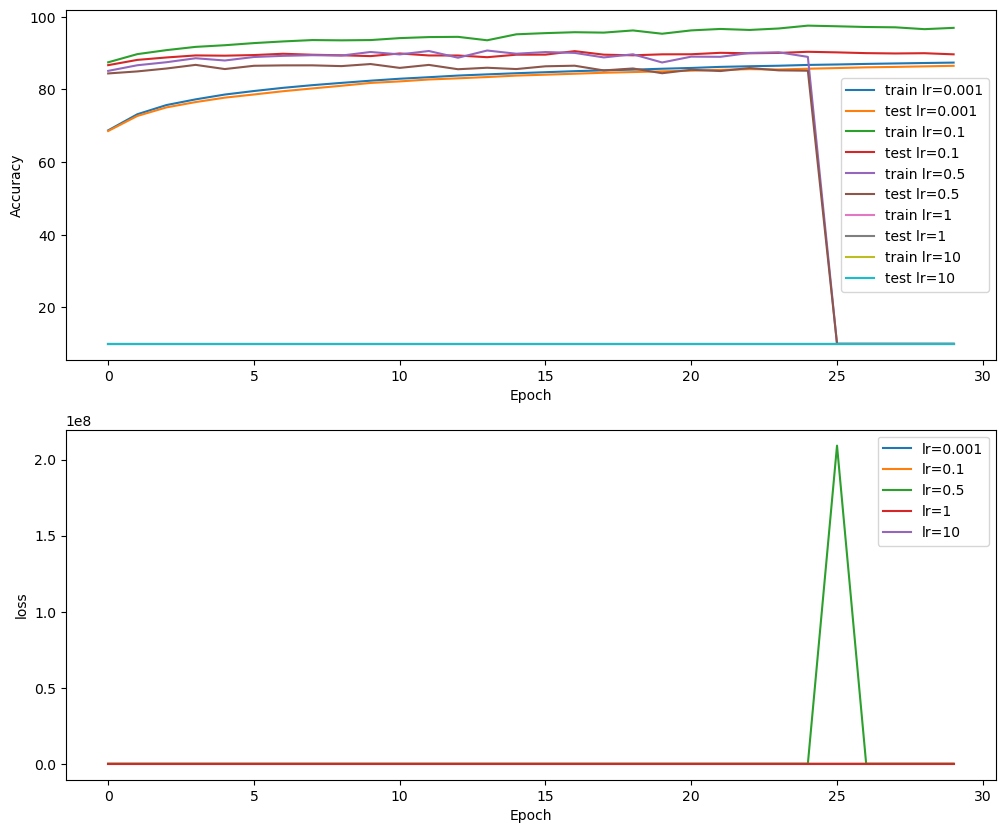

In [44]:
fig,axs = plt.subplots(2,figsize=(12,10))

learning_rates = [0.001,0.1,0.5,1,10]
for k in range(len(learning_rates)):
    device = torch.device("cuda:0")
    alpha = learning_rates[k]

    net = MyCNN().to(device)
    net.apply(weight_init)

    ## Cross entropy loss is the most appropriate loss function to use.
    loss_fn = nn.CrossEntropyLoss()
    loss_fn.to(device)

    opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    test_accuracy = []
    print(f"Training model with learning rate {alpha}:")
    for epoch in range(max_epochs):
        loss_epoch = 0
        for i,data in enumerate(train_loader, 0):
            net.train()
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            opt.zero_grad()
            outputs = net(inputs)

            loss = loss_fn(outputs, labels)

            loss.backward()

            opt.step()

            loss_epoch += loss.item()

        loss_epoch_array.append(loss_epoch)
        train_accuracy.append(evaluation(train_loader))
        test_accuracy.append(evaluation(test_loader))
        print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Accuracy")
    axs[0].plot(train_accuracy, label=f"train lr={alpha}")
    axs[0].plot(test_accuracy, label=f"test lr={alpha}")
    axs[0].legend()

    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("loss")
    axs[1].plot(loss_epoch_array, label=f"lr={alpha}")
    axs[1].legend()

The figures above show the accuracy on the training set and test set and also the loss on the training set using multiple different learning rates.

Q5

In [45]:
device = torch.device("cuda:0")
alpha = 0.1

net = MyCNN(dropout_rate=0.3).to(device)
net.apply(weight_init)

## Cross entropy loss is the most appropriate loss function to use.
loss_fn = nn.CrossEntropyLoss()
loss_fn.to(device)

opt = torch.optim.SGD(list(net.parameters()), lr=alpha)

loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []
for epoch in range(max_epochs):
    loss_epoch = 0
    for i,data in enumerate(train_loader, 0):
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        opt.zero_grad()
        outputs = net(inputs)
        
        loss = loss_fn(outputs, labels)
        
        loss.backward()
        
        opt.step()
        
        loss_epoch += loss.item()
        
    loss_epoch_array.append(loss_epoch)
    train_accuracy.append(evaluation(train_loader))
    test_accuracy.append(evaluation(test_loader))
    print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 1045.0781792029738, train accuracy: 87.05833333333334, valid accuracy:85.63
Epoch 2: loss: 642.1958642117679, train accuracy: 89.22333333333333, valid accuracy:87.86
Epoch 3: loss: 550.6346784904599, train accuracy: 90.38666666666667, valid accuracy:88.62
Epoch 4: loss: 489.08069354481995, train accuracy: 91.31833333333333, valid accuracy:89.37
Epoch 5: loss: 442.9820605479181, train accuracy: 91.78333333333333, valid accuracy:89.38
Epoch 6: loss: 400.9113466423005, train accuracy: 91.99333333333334, valid accuracy:89.34
Epoch 7: loss: 362.53177705965936, train accuracy: 93.035, valid accuracy:90.07
Epoch 8: loss: 326.4027085546404, train accuracy: 93.63166666666666, valid accuracy:90.08
Epoch 9: loss: 300.0406441120431, train accuracy: 93.695, valid accuracy:89.91
Epoch 10: loss: 268.9295513262041, train accuracy: 94.01, valid accuracy:90.02
Epoch 11: loss: 243.5510170860216, train accuracy: 94.34166666666667, valid accuracy:89.91
Epoch 12: loss: 229.76533926604316, tra

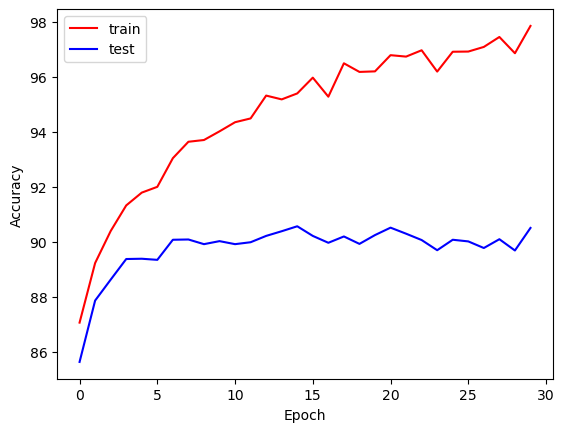

In [46]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracy, "r")
plt.plot(test_accuracy, "b")
plt.gca().legend(('train','test'))

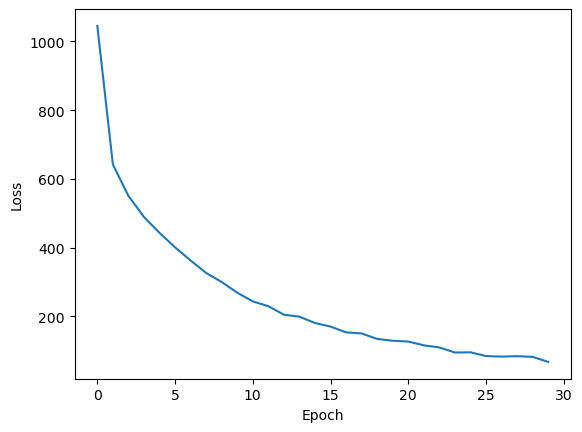

In [47]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

The figures above show the accuracy on the training set and the test set and the loss on the training set as the number of epochs increases.